# Load Data

In [117]:
# Enable autoreload for development
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
# Setup
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [119]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [120]:
# Load and clean data
from src.load_data import load_data

In [121]:
df = load_data()
df

No.  Diameter (mm)  Speed (rpm)  Feed (mm/rev)  Thrust force (N)  \
0      1            9.0          500           0.13            1088.1   
1      2            9.0          500           0.18            1435.1   
2      3            9.0          500           0.25            1588.3   
3      4            9.0          500           0.36            1669.8   
4      5            9.0          400           0.13            1150.9   
..   ...            ...          ...            ...               ...   
160  161           10.0         1000           0.50            1960.0   
161  162            7.5         1000           0.50             784.0   
162  163            5.0         1000           0.50             651.0   
163  164           10.0         1000           0.71            2009.0   
164  165            7.5         1000           0.71             970.0   

     Torque (Nm)  Flank wear (mm)  Workpiece  
0          10.67             0.10  cast iron  
1          14.66             0.13  cast iron  
2          16.04             0.06  cast iron  
3          17.12             0.09  cast iron  
4          11.22             0.12  cast iron  
..           ...              ...        ...  
160        18.13             0.13     copper  
161         7.35             0.10     copper  
162         6.17             0.07     copper  
163        20.58             0.17     copper  
164         8.05             0.12     copper  

[165 rows x 8 columns]

# Clean the data

In [122]:
from src.clean_data import clean_dataset, add_features
df_clean = clean_dataset(df)

In [123]:
df.shape

(165, 8)

# Feature Engineering

In [124]:
df_clean = add_features(df_clean)  # ⬅ Feature Engineering : this includes new features

In [125]:
# Identify one-hot workpiece columns (e.g., 'workpiece_b', 'workpiece_c', etc.)
workpiece_cols = [col for col in df_clean.columns if col.startswith('workpiece_')]

In [126]:
df_clean["thrust_force_(n)"] = df_clean["thrust_force_(n)"] / 1000

In [127]:
from src.outlier_handling import cap_outliers_iqr
df_clean = cap_outliers_iqr(df_clean, 'thrust_force_(n)', multiplier=1.5)


[Capping] thrust_force_(n) → Q1: 0.84, Q3: 2.48, Lower: -1.64, Upper: 4.96


# New list of Columns

In [128]:
# Confirm all required columns exist
print("Cleaned Columns:", df_clean.columns.tolist())

Cleaned Columns: ['no.', 'diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 'thrust_force_(n)', 'torque_(nm)', 'flank_wear_(mm)', 'workpiece_copper', 'workpiece_mild steel', 'speed_per_dia', 'log_feed', 'torque_feed_ratio', 'material_hardness', 'feed_squared', 'speed_squared']


In [129]:
df_clean.shape

(164, 15)

In [130]:
# Correlation of all features with Flank Wear
corr_matrix = df_clean.corr(numeric_only=True)
flank_corr = corr_matrix['flank_wear_(mm)'].sort_values(ascending=False)
print("Correlation with Flankwear")
display(flank_corr)


Correlation with Flankwear


flank_wear_(mm)         1.000000
diameter_(mm)           0.376967
thrust_force_(n)        0.366448
torque_feed_ratio       0.335095
torque_(nm)             0.214763
material_hardness       0.163496
workpiece_copper       -0.032785
no.                    -0.095608
feed_squared           -0.114098
workpiece_mild steel   -0.119936
feed_(mm/rev)          -0.129171
log_feed               -0.133833
speed_squared          -0.197722
speed_(rpm)            -0.204360
speed_per_dia          -0.334941
Name: flank_wear_(mm), dtype: float64

# Plots

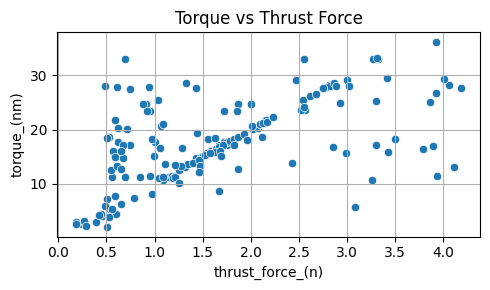

In [131]:
# ['diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 'workpiece_copper',
# 'thrust_force_(n)', 'flank_wear_(mm)', 'torque_(nm)' 
# 'workpiece_mild steel', 'speed_per_dia', 'log_feed', 
# 'torque_feed_ratio', 'material_hardness', 'torque_(nm)',
# 'feed_squared', 'speed_squared']
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_clean, x='thrust_force_(n)', y='torque_(nm)')
plt.title("Torque vs Thrust Force")
plt.grid(True)
plt.tight_layout()
plt.show()


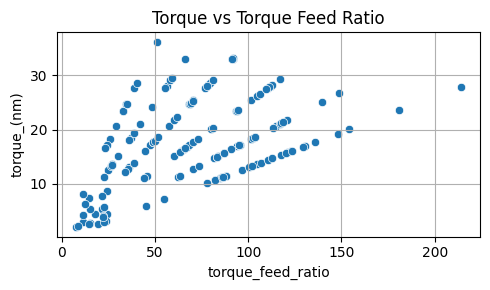

In [132]:
# ['diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 'workpiece_copper',
# 'thrust_force_(n)', 'flank_wear_(mm)', 'torque_(nm)' 
# 'workpiece_mild steel', 'speed_per_dia', 'log_feed', 
# 'torque_feed_ratio', 'material_hardness', 'torque_(nm)',
# 'feed_squared', 'speed_squared']
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_clean, x='torque_feed_ratio', y='torque_(nm)')
plt.title("Torque vs Torque Feed Ratio")
plt.grid(True)
plt.tight_layout()
plt.show()


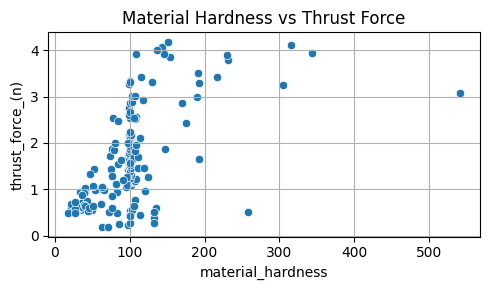

In [133]:
# ['diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 'workpiece_copper',
# 'thrust_force_(n)', 'flank_wear_(mm)', 'torque_(nm)' 
# 'workpiece_mild steel', 'speed_per_dia', 'log_feed', 
# 'torque_feed_ratio', 'material_hardness', 'torque_(nm)',
# 'feed_squared', 'speed_squared']
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_clean, x='material_hardness', y='thrust_force_(n)')
plt.title("Material Hardness vs Thrust Force")
plt.grid(True)
plt.tight_layout()
plt.show()


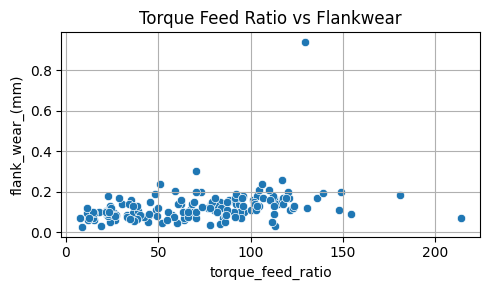

In [134]:
# ['diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 'workpiece_copper',
# 'thrust_force_(n)', 'flank_wear_(mm)', 'torque_(nm)' 
# 'workpiece_mild steel', 'speed_per_dia', 'log_feed', 
# 'torque_feed_ratio', 'material_hardness', 'torque_(nm)',
# 'feed_squared', 'speed_squared']
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_clean, x='torque_feed_ratio', y='flank_wear_(mm)')
plt.title("Torque Feed Ratio vs Flankwear")
plt.grid(True)
plt.tight_layout()
plt.show()


# Features and targets:

In [135]:
X = df_clean[['diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)',
              'speed_per_dia', 'log_feed',
              'torque_feed_ratio', 'material_hardness',
              'feed_squared', 'speed_squared'] + workpiece_cols]
import numpy as np
# Target transformation: log-transform all 3 targets
y = df_clean[['thrust_force_(n)', 'torque_(nm)', 'flank_wear_(mm)']].copy()

# Log-transform each to handle skewness and stabilize variance
for col in y.columns:
    y[col] = np.log1p(y[col])  # log1p avoids issues with zeros

# Interpretation: 
(a)Torque values seem to follow a roughly normal distribution with no significant outliers.
(b)Flank wear had outliers or noise at the high end, which were removed during cleaning.

In [136]:
# Model tuning
from src.tune_models import tune_random_forest
best_rf, best_params, cv_results = tune_random_forest(X, y)
print("Best Params:", best_params)

import pandas as pd
cv_df = pd.DataFrame(cv_results)
cv_df = cv_df.sort_values(by='mean_test_score', ascending=False)
#cv_df[['params', 'mean_test_score', 'rank_test_score']].head()

Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}


# Target: torque_(nm)

In [137]:
# Model training and evaluation
from src.model_train import train_models

results = train_models(X, y)

# Extract test set and predictions (still log-scale here)
X_test = results['X_test']
y_test_log = results['y_test']      # ✅ rename for clarity
models = results['models']
metrics = results['metrics']

# ✅ Inverse transform log-scale targets for real-world evaluation
import numpy as np
y_test_orig = np.expm1(np.clip(y_test_log.values, 0, 20))

In [138]:
import pandas as pd

rows = []

#'thrust_force_(n)', 'torque_(nm)', 'flank_wear_(mm)'

for model_name, model_metrics in metrics.items():
    for i, target in enumerate(y.columns):
        if target == 'torque_(nm)':  # only process 'torque'
            row = {
                'Model': model_name,
                'Target': target,
                'R': model_metrics.get('R', [None]*len(y.columns))[i],
                'R2': model_metrics.get('R2', [None]*len(y.columns))[i],
                'MAE': model_metrics.get('MAE', [None]*len(y.columns))[i],
                'MSE': model_metrics.get('MSE', [None]*len(y.columns))[i],
                'RMSE': model_metrics.get('RMSE', [None]*len(y.columns))[i]
            }
            rows.append(row)

summary_df = pd.DataFrame(rows)
display(summary_df.sort_values(by='Model'))


Model       Target         R        R2       MAE       MSE      RMSE
2      AdaBoost  torque_(nm)  0.955800  0.895951  1.802407  6.395532  2.528939
0  RandomForest  torque_(nm)  0.957037  0.913854  1.633205  5.295114  2.301111
1       XGBoost  torque_(nm)  0.967756  0.934430  1.242508  4.030328  2.007568

In [139]:
# # Auto-install LIME if not already installed
# try:
#     from lime.lime_tabular import LimeTabularExplainer
# except ImportError:
#     print("LIME not found. Installing it now...")
#     %pip install lime
#     from lime.lime_tabular import LimeTabularExplainer


# LIME explanation for XGBoost prediction of torque_(nm) 

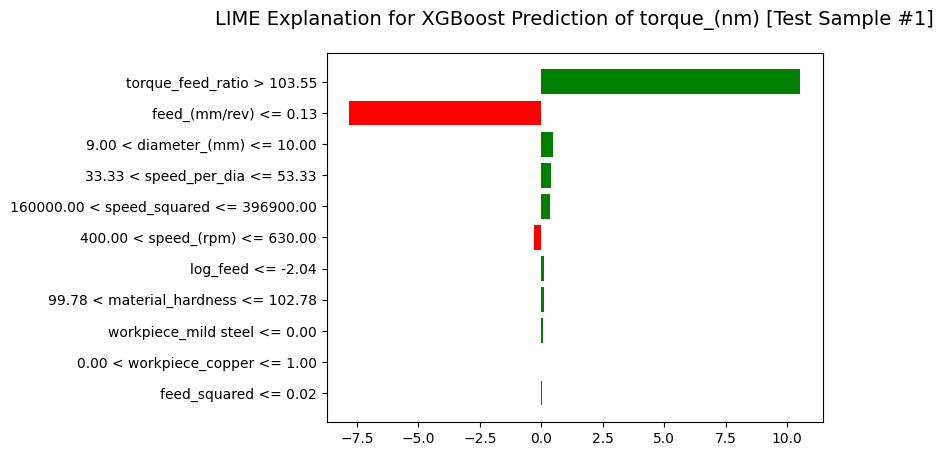


Top contributing features to this prediction:
torque_feed_ratio > 103.55     : 10.5305
feed_(mm/rev) <= 0.13          : -7.8176
9.00 < diameter_(mm) <= 10.00  : 0.4974
33.33 < speed_per_dia <= 53.33 : 0.3962
160000.00 < speed_squared <= 396900.00 : 0.3558
400.00 < speed_(rpm) <= 630.00 : -0.2784
log_feed <= -2.04              : 0.1101
99.78 < material_hardness <= 102.78 : 0.1051
workpiece_mild steel <= 0.00   : 0.0647
0.00 < workpiece_copper <= 1.00 : -0.0227
feed_squared <= 0.02           : 0.0170


In [140]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Step 1: Set up the LIME explainer using test set
feature_names = X_test.columns.tolist()

explainer = LimeTabularExplainer(
    training_data=X_test.values,
    feature_names=feature_names,
    mode='regression'
)

# Step 2: Select test instance to explain
idx = 1  # or pick any index you want
instance = X_test.iloc[idx].values.reshape(1, -1)

# Step 3: Define custom predict_fn for torque_(nm)
# NOTE: torque_(nm) is the second column (index 1) of y
def predict_fn_torque(X):
    log_preds = models['XGBoost'].predict(X)
    torque_log = log_preds[:, 1]
    return np.expm1(torque_log).reshape(-1, 1)

# Step 4: Generate LIME explanation
exp = explainer.explain_instance(
    data_row=instance.flatten(),
    predict_fn=predict_fn_torque,
    num_features=len(feature_names)
)
# Step 5: Plot with white background
fig = exp.as_pyplot_figure()
#fig.patch.set_facecolor('white')   # ✅ set background to white
plt.title(f"LIME Explanation for XGBoost Prediction of torque_(nm) [Test Sample #{idx}]", fontsize=14, pad=20)
plt.show()

# Step 6: Show results
exp.show_in_notebook()  # interactive display
# Optional: textual summary
print("\nTop contributing features to this prediction:")
for feature, weight in exp.as_list():
    print(f"{feature:30} : {weight:.4f}")

In [141]:
# ['diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 'workpiece_copper',
# 'thrust_force_(n)', 'flank_wear_(mm)', 'torque_(nm)' 
# 'workpiece_mild steel', 'speed_per_dia', 'log_feed', 
# 'torque_feed_ratio', 'material_hardness',
# 'feed_squared', 'speed_squared']

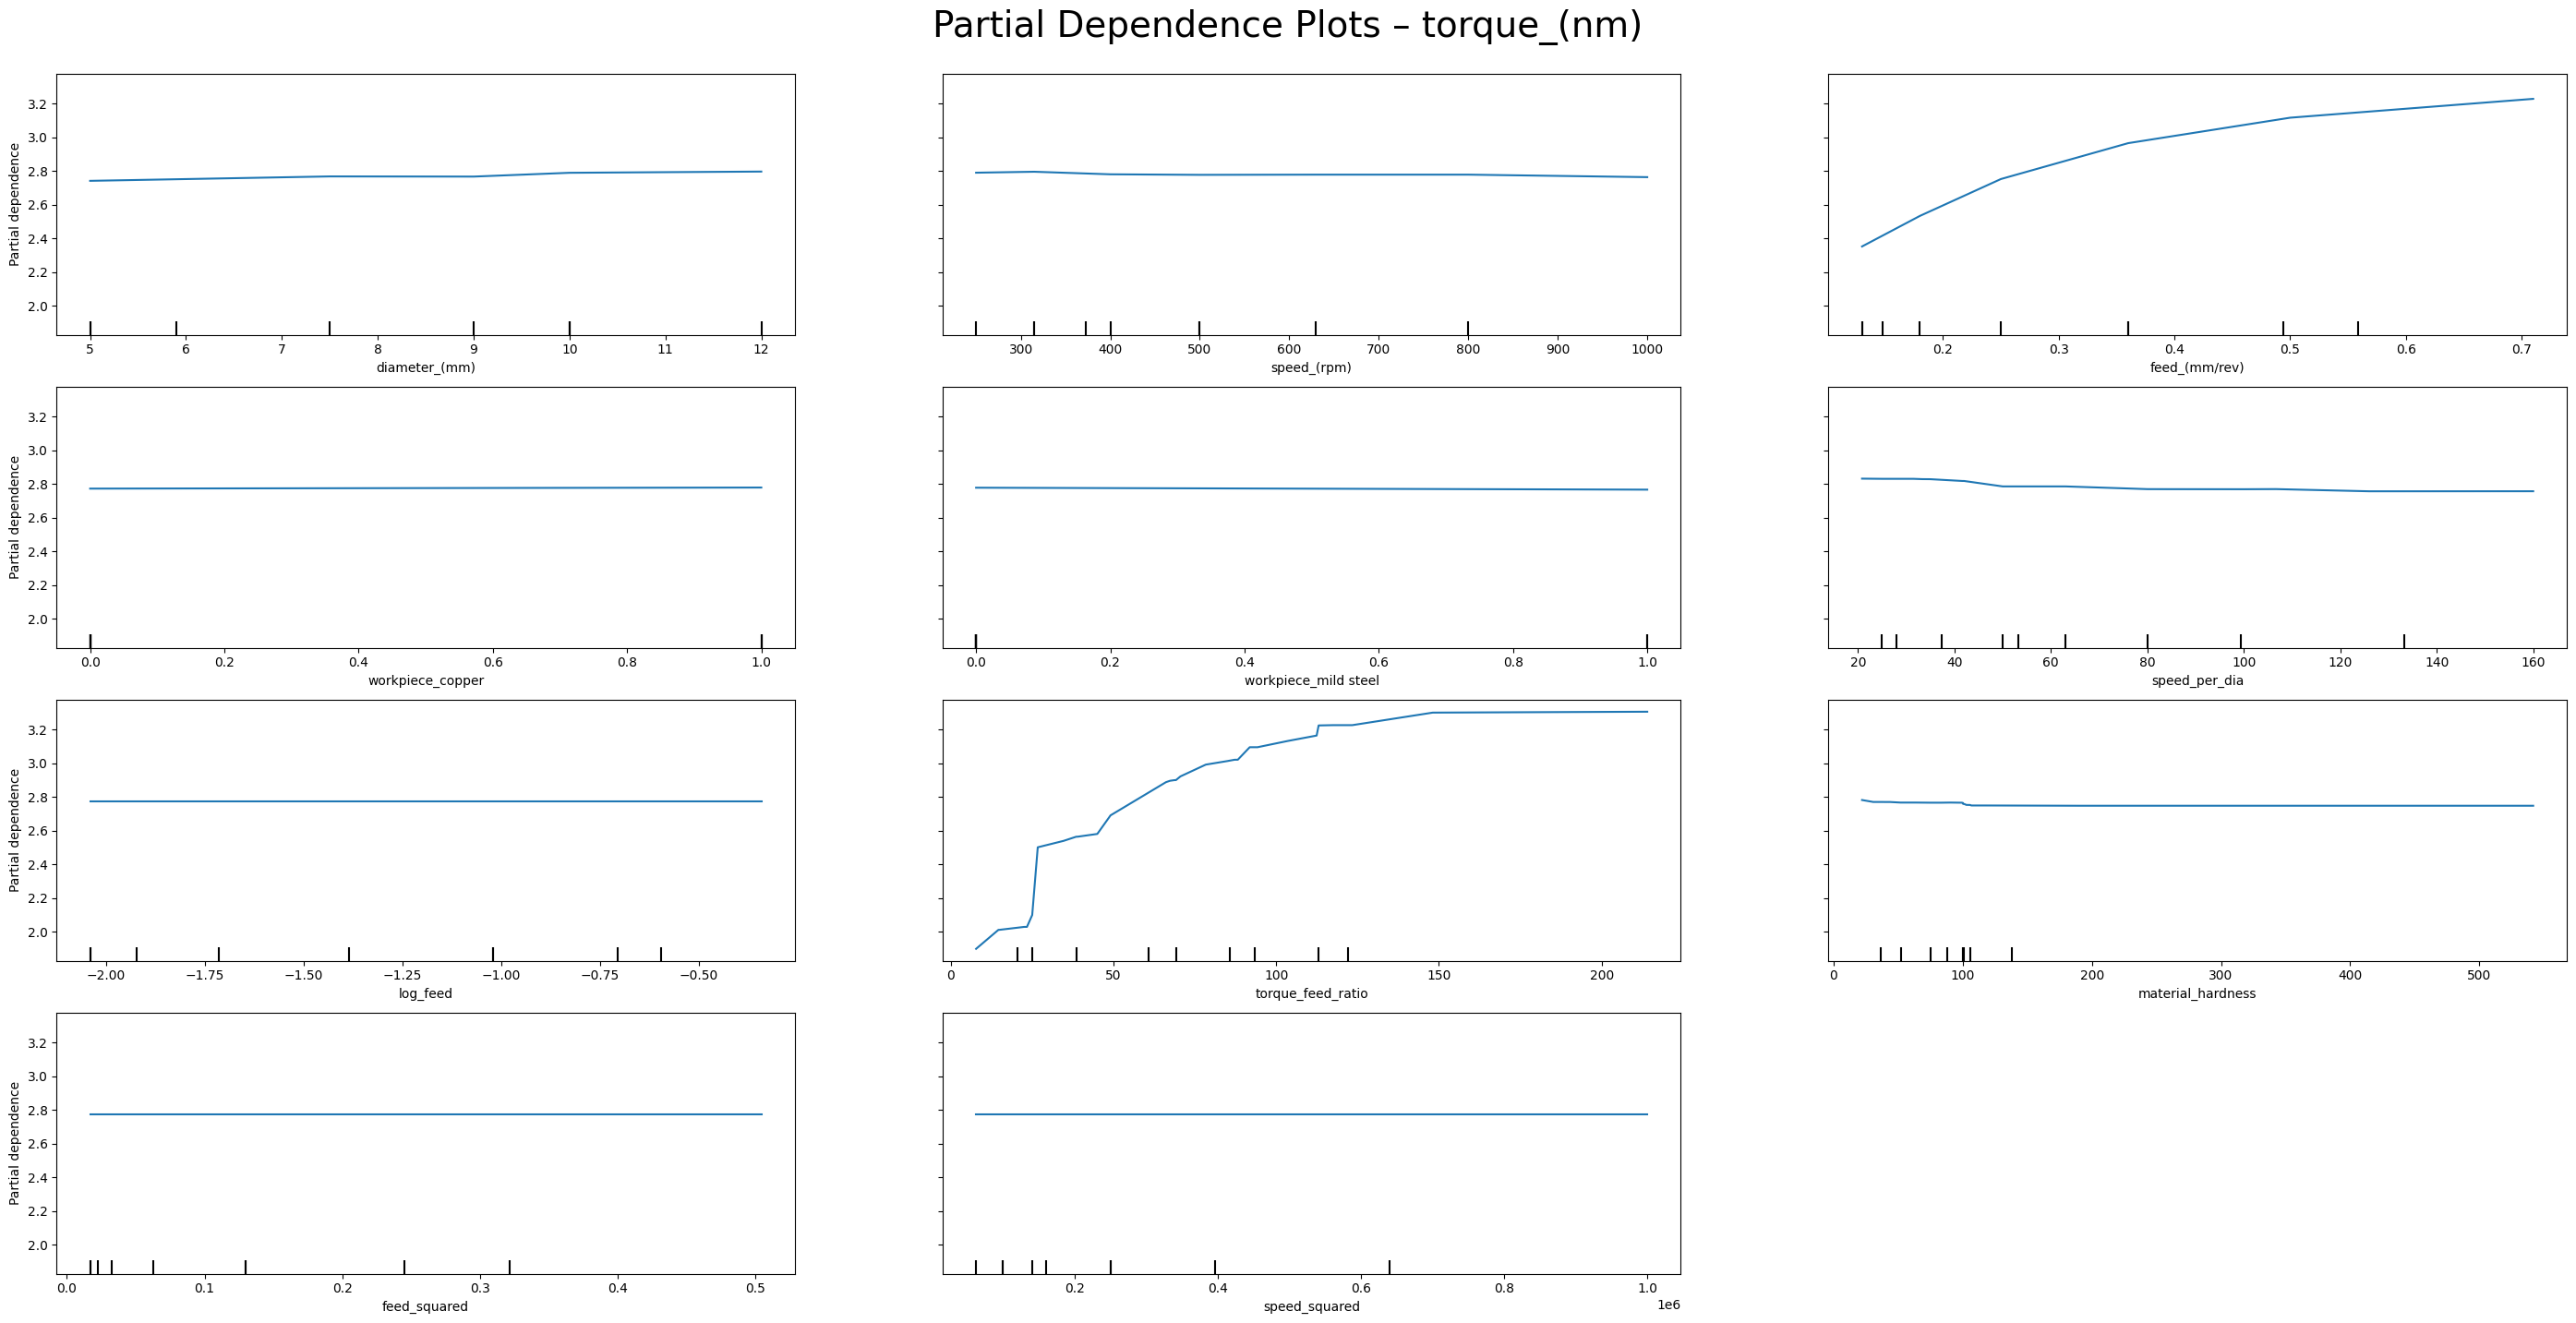

In [142]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Model for torque_(nm)
xgb_model_torque = results['models']['XGBoost'].estimators_[1]

# Features for PDP
features = [
    'diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 
    'workpiece_copper', 'workpiece_mild steel', 
    'speed_per_dia', 'log_feed', 'torque_feed_ratio', 
    'material_hardness', 'feed_squared', 'speed_squared'
]

# Optional: Ensure X_test has only float values
X_test = X_test.astype(float)

# Create PDP
disp = PartialDependenceDisplay.from_estimator(
    estimator=xgb_model_torque,
    X=X_test,
    features=features,
    feature_names=X_test.columns.tolist(),
    kind='average',
    grid_resolution=50,
    n_jobs=-1
)

# Resize and finalize the plot
fig = disp.figure_
fig.set_size_inches(28, 14)
plt.suptitle("Partial Dependence Plots – torque_(nm)", fontsize=28, y=1.02) 
plt.tight_layout()
plt.subplots_adjust(top=0.97)
plt.show()


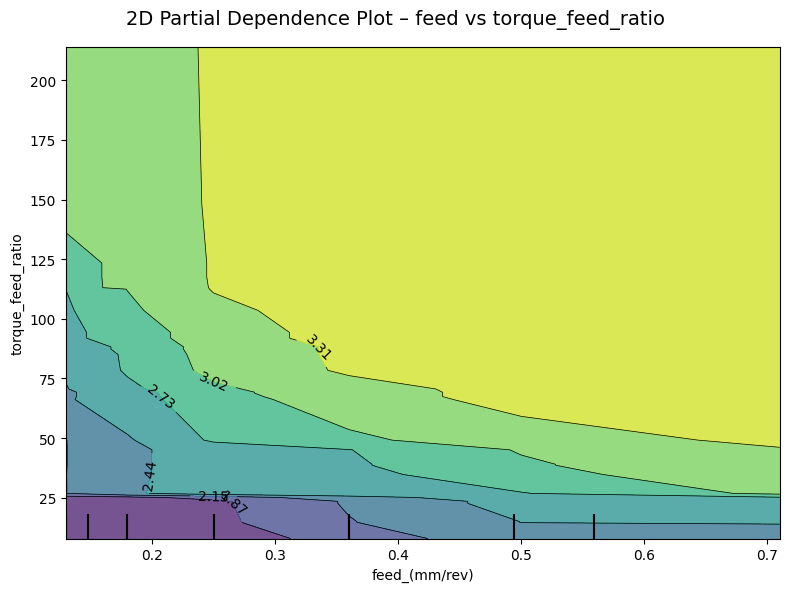

In [143]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

xgb_model_torque = results['models']['XGBoost'].estimators_[1]

# Plot 2D PDP
fig, ax = plt.subplots(figsize=(8, 6))

PartialDependenceDisplay.from_estimator(
    estimator=xgb_model_torque,
    X=X_test,
    features=[('feed_(mm/rev)', 'torque_feed_ratio')],
    feature_names=X_test.columns.tolist(),
    kind='average',
    grid_resolution=50,
    ax=ax
)

plt.suptitle("2D Partial Dependence Plot – feed vs torque_feed_ratio", fontsize=14)
plt.tight_layout()
plt.show()


# Target: flankwear

In [144]:
from src.train_flankwear import train_flankwear_models
X = df_clean[['diameter_(mm)',
 'speed_(rpm)',
 'feed_(mm/rev)',
 'thrust_force_(n)',
 'torque_(nm)',
 #'flank_wear_(mm)',
 'workpiece_copper',
 'workpiece_mild steel',
 'speed_per_dia',
 'log_feed',
 'torque_feed_ratio',
 'material_hardness',
 'feed_squared',
 'speed_squared']]

y_flank = df_clean['flank_wear_(mm)']


In [145]:
results = train_flankwear_models(X, y_flank)

# Collect results into a list of dictionaries
table_data = []

for model_name, result in results.items():
    metrics = result['metrics']
    metrics['Model'] = model_name
    table_data.append(metrics)

# Convert to DataFrame
results_df = pd.DataFrame(table_data)

# Reorder columns (optional)
cols = ['Model', 'R', 'R2', 'MAE', 'MSE', 'RMSE', 'MAPE']
results_df = results_df[cols]

# Display the table
print("Results of Flankwear:")
print("----------------------")
print(results_df.to_string(index=False)) 


Results of Flankwear:
----------------------
       Model        R       R2      MAE      MSE     RMSE      MAPE
RandomForest 0.752490 0.531190 0.027771 0.001488 0.038570 33.523487
     XGBoost 0.921476 0.909162 0.023187 0.000876 0.029592 27.557532
    AdaBoost 0.620990 0.481403 0.030576 0.001568 0.039601 36.621997


# LIME Explanation for XGBoost prediction of flank_wear :


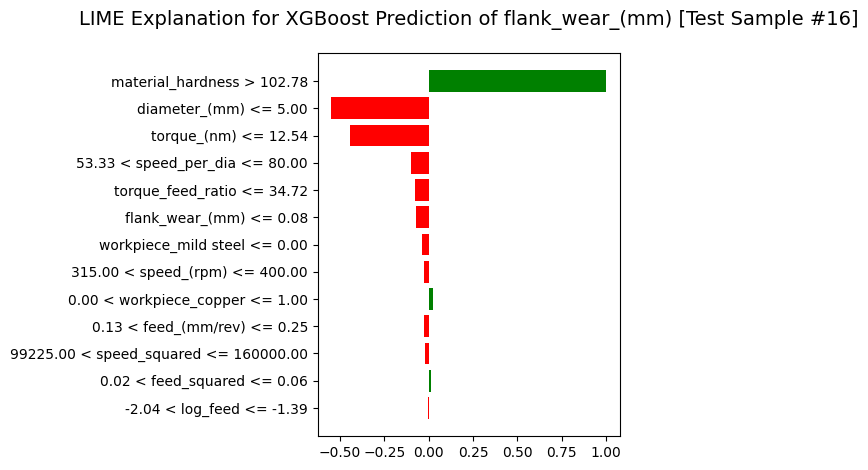


Top contributing features to this prediction:
material_hardness > 102.78     : 1.0018
diameter_(mm) <= 5.00          : -0.5488
torque_(nm) <= 12.54           : -0.4414
53.33 < speed_per_dia <= 80.00 : -0.0992
torque_feed_ratio <= 34.72     : -0.0772
flank_wear_(mm) <= 0.08        : -0.0735
workpiece_mild steel <= 0.00   : -0.0368
315.00 < speed_(rpm) <= 400.00 : -0.0267
0.00 < workpiece_copper <= 1.00 : 0.0263
0.13 < feed_(mm/rev) <= 0.25   : -0.0260
99225.00 < speed_squared <= 160000.00 : -0.0186
0.02 < feed_squared <= 0.06    : 0.0137
-2.04 < log_feed <= -1.39      : -0.0014


In [157]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load XGBoost model and test data from the flankwear results
xgb_model_flank = results['XGBoost']['model']
X_test = results['XGBoost']['X_test']
feature_names = X_test.columns.tolist()

# Step 2: Choose the test instance to explain
idx = 16  # 🔁 change to any index you want
instance = X_test.iloc[idx].values.reshape(1, -1)

# Step 3: Define predict function with inverse log transform
def predict_fn_flank(X):
    log_preds = xgb_model_flank.predict(X)
    return np.expm1(log_preds).reshape(-1, 1)  # Return shape: (n_samples, 1)

# Step 4: Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_test.values,
    feature_names=feature_names,
    mode='regression'
)

# Step 5: Generate LIME explanation
exp = explainer.explain_instance(
    data_row=instance.flatten(),
    predict_fn=predict_fn_flank,
    num_features=len(feature_names)
)

# Step 6: Plot explanation
fig = exp.as_pyplot_figure()
fig.patch.set_facecolor('white')
plt.title(f"LIME Explanation for XGBoost Prediction of flank_wear_(mm) [Test Sample #{idx}]", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Step 7: Print feature contributions
print("\nTop contributing features to this prediction:")
for feature, weight in exp.as_list():
    print(f"{feature:30} : {weight:.4f}")

# Optional: Interactive output in notebook
exp.show_in_notebook()


# Explanations for 5 worst predictions for Flank_wear

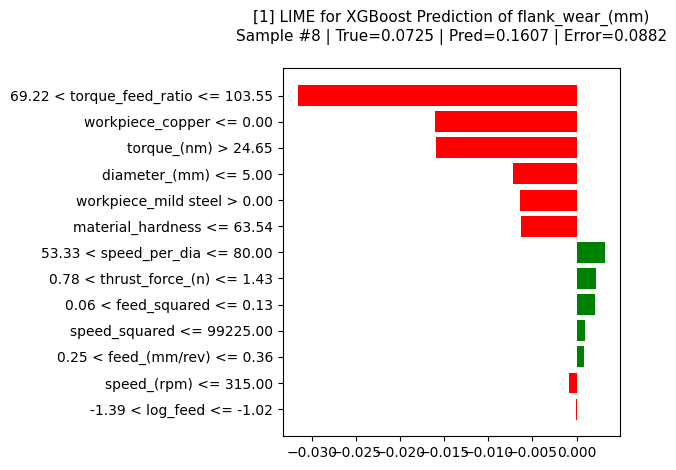


[Sample #8] True: 0.0725, Pred: 0.1607, Error: 0.0882
69.22 < torque_feed_ratio <= 103.55 : -0.0316
workpiece_copper <= 0.00            : -0.0161
torque_(nm) > 24.65                 : -0.0160
diameter_(mm) <= 5.00               : -0.0072
workpiece_mild steel > 0.00         : -0.0064
material_hardness <= 63.54          : -0.0064
53.33 < speed_per_dia <= 80.00      : 0.0032
0.78 < thrust_force_(n) <= 1.43     : 0.0023
0.06 < feed_squared <= 0.13         : 0.0021
speed_squared <= 99225.00           : 0.0010
0.25 < feed_(mm/rev) <= 0.36        : 0.0009
speed_(rpm) <= 315.00               : -0.0009
-1.39 < log_feed <= -1.02           : -0.0000

----------------------------------------------------------------------


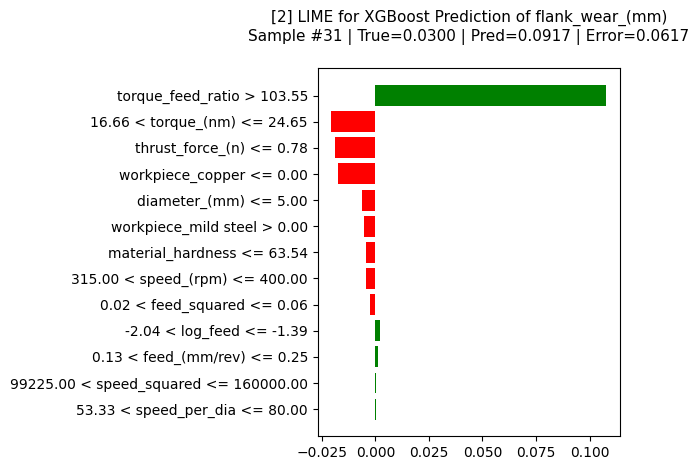


[Sample #31] True: 0.0300, Pred: 0.0917, Error: 0.0617
torque_feed_ratio > 103.55          : 0.1078
16.66 < torque_(nm) <= 24.65        : -0.0205
thrust_force_(n) <= 0.78            : -0.0190
workpiece_copper <= 0.00            : -0.0176
diameter_(mm) <= 5.00               : -0.0062
workpiece_mild steel > 0.00         : -0.0052
material_hardness <= 63.54          : -0.0046
315.00 < speed_(rpm) <= 400.00      : -0.0043
0.02 < feed_squared <= 0.06         : -0.0024
-2.04 < log_feed <= -1.39           : 0.0022
0.13 < feed_(mm/rev) <= 0.25        : 0.0013
99225.00 < speed_squared <= 160000.00 : 0.0005
53.33 < speed_per_dia <= 80.00      : 0.0001

----------------------------------------------------------------------


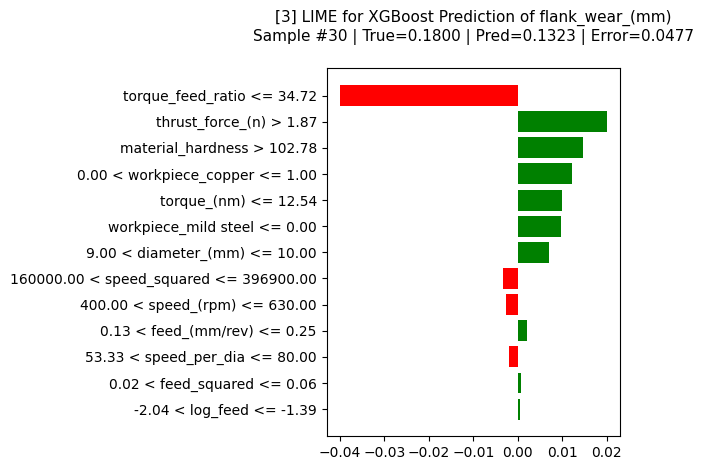


[Sample #30] True: 0.1800, Pred: 0.1323, Error: 0.0477
torque_feed_ratio <= 34.72          : -0.0400
thrust_force_(n) > 1.87             : 0.0200
material_hardness > 102.78          : 0.0146
0.00 < workpiece_copper <= 1.00     : 0.0122
torque_(nm) <= 12.54                : 0.0100
workpiece_mild steel <= 0.00        : 0.0097
9.00 < diameter_(mm) <= 10.00       : 0.0071
160000.00 < speed_squared <= 396900.00 : -0.0033
400.00 < speed_(rpm) <= 630.00      : -0.0027
0.13 < feed_(mm/rev) <= 0.25        : 0.0020
53.33 < speed_per_dia <= 80.00      : -0.0019
0.02 < feed_squared <= 0.06         : 0.0008
-2.04 < log_feed <= -1.39           : 0.0006

----------------------------------------------------------------------


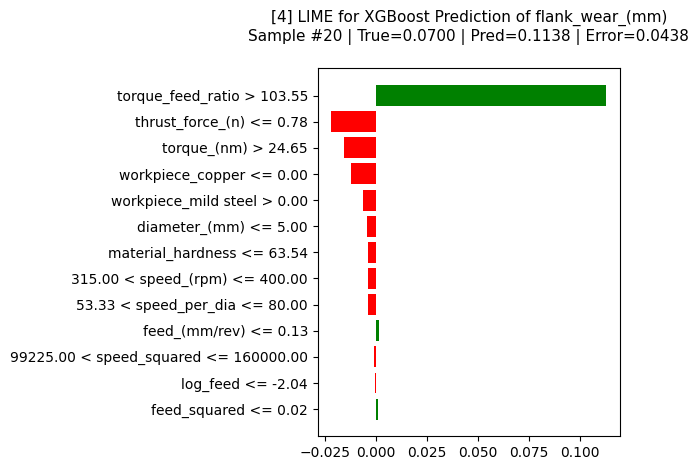


[Sample #20] True: 0.0700, Pred: 0.1138, Error: 0.0438
torque_feed_ratio > 103.55          : 0.1131
thrust_force_(n) <= 0.78            : -0.0220
torque_(nm) > 24.65                 : -0.0157
workpiece_copper <= 0.00            : -0.0125
workpiece_mild steel > 0.00         : -0.0065
diameter_(mm) <= 5.00               : -0.0047
material_hardness <= 63.54          : -0.0042
315.00 < speed_(rpm) <= 400.00      : -0.0042
53.33 < speed_per_dia <= 80.00      : -0.0039
feed_(mm/rev) <= 0.13               : 0.0011
99225.00 < speed_squared <= 160000.00 : -0.0011
log_feed <= -2.04                   : -0.0008
feed_squared <= 0.02                : 0.0008

----------------------------------------------------------------------


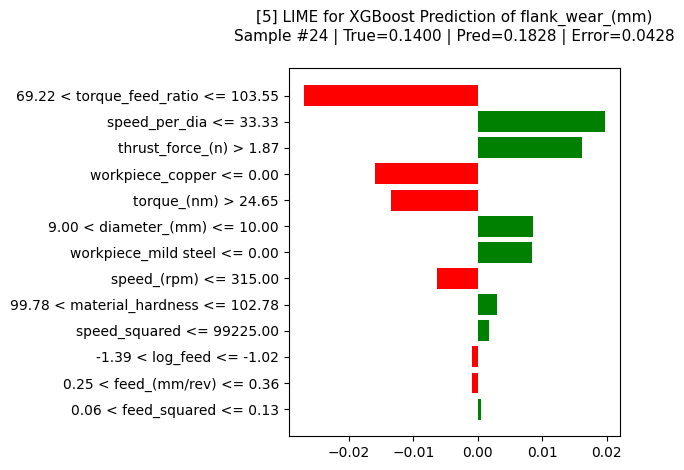


[Sample #24] True: 0.1400, Pred: 0.1828, Error: 0.0428
69.22 < torque_feed_ratio <= 103.55 : -0.0270
speed_per_dia <= 33.33              : 0.0197
thrust_force_(n) > 1.87             : 0.0162
workpiece_copper <= 0.00            : -0.0160
torque_(nm) > 24.65                 : -0.0135
9.00 < diameter_(mm) <= 10.00       : 0.0086
workpiece_mild steel <= 0.00        : 0.0084
speed_(rpm) <= 315.00               : -0.0064
99.78 < material_hardness <= 102.78 : 0.0029
speed_squared <= 99225.00           : 0.0017
-1.39 < log_feed <= -1.02           : -0.0009
0.25 < feed_(mm/rev) <= 0.36        : -0.0009
0.06 < feed_squared <= 0.13         : 0.0005

----------------------------------------------------------------------


In [148]:
import numpy as np
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

# === Extract what we need ===
xgb_model = results['XGBoost']['model']
X_test = results['XGBoost']['X_test']
y_test_log = results['XGBoost']['y_test']
y_test_true = np.expm1(y_test_log)  # inverse log1p
y_pred_log = xgb_model.predict(X_test)
y_pred_true = np.expm1(y_pred_log)

# === Calculate absolute errors ===
errors = np.abs(y_test_true - y_pred_true)

# === Get indices of top N worst errors ===
N = 5  # 🔁 change this to any N you want
worst_indices = np.argsort(-errors)[:N]

# === Create LIME explainer ===
explainer = LimeTabularExplainer(
    training_data=X_test.values,
    feature_names=X_test.columns.tolist(),
    mode='regression'
)

# === Loop through top N errors and explain ===
for rank, idx in enumerate(worst_indices, 1):
    instance = X_test.iloc[idx].values.reshape(1, -1)

    def predict_fn(X):
        log_preds = xgb_model.predict(X)
        return np.expm1(log_preds).reshape(-1, 1)

    exp = explainer.explain_instance(
        data_row=instance.flatten(),
        predict_fn=predict_fn,
        num_features=len(X_test.columns)
    )

    # === Plot explanation ===
    fig = exp.as_pyplot_figure()
    fig.patch.set_facecolor('white')
    plt.title(f"[{rank}] LIME for XGBoost Prediction of flank_wear_(mm)\nSample #{idx} | True={y_test_true.iloc[idx]:.4f} | Pred={y_pred_true[idx]:.4f} | Error={errors.iloc[idx]:.4f}",
          fontsize=11, pad=20)
    plt.tight_layout()
    plt.show()

    # === Print text summary ===
    print(f"\n[Sample #{idx}] True: {y_test_true.iloc[idx]:.4f}, Pred: {y_pred_true[idx]:.4f}, Error: {errors.iloc[idx]:.4f}")
    for feature, weight in exp.as_list():
        print(f"{feature:35} : {weight:.4f}")
    print("\n" + "-"*70)


# PDP Explanation for XGBoost prediction of flank_wear :


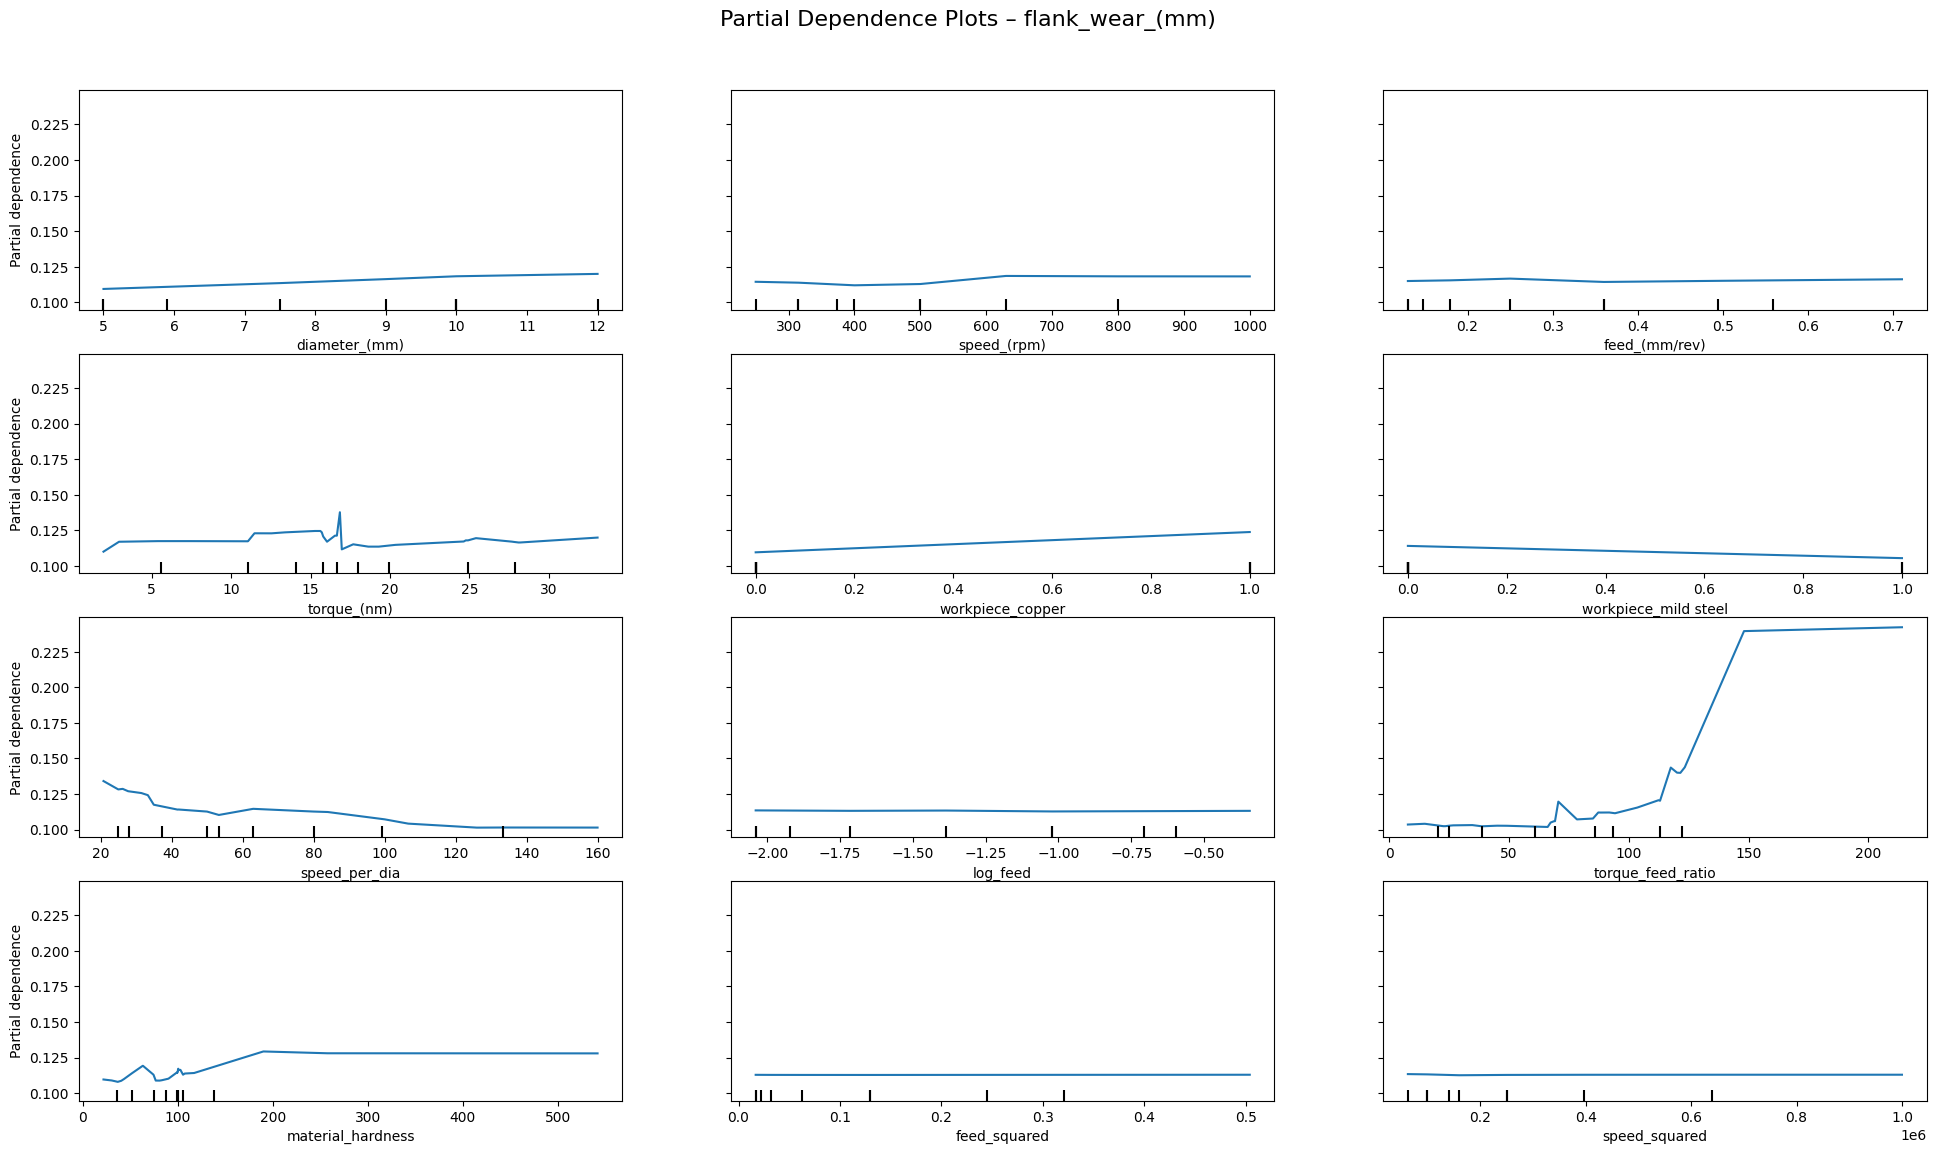

In [149]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Step 1: Extract model and test data
xgb_model_flank = results['XGBoost']['model']
X_test_flank = results['XGBoost']['X_test']  # from your returned dict
# Convert all integer columns in X_test_flank to float
X_test_flank = X_test_flank.astype(float)

# Step 2: Define feature list for PDP
features_flankwear = [
    'diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 
    'torque_(nm)', 'workpiece_copper', 'workpiece_mild steel',
    'speed_per_dia', 'log_feed', 'torque_feed_ratio', 
    'material_hardness', 'feed_squared', 'speed_squared'
]

# Step 3: Plot PDPs
fig, ax = plt.subplots(figsize=(20, 12))  # Adjust size to avoid overlapping
disp = PartialDependenceDisplay.from_estimator(
    estimator=xgb_model_flank,
    X=X_test_flank,
    features=features_flankwear,
    feature_names=X_test_flank.columns.tolist(),
    kind='average',
    grid_resolution=50,
    ax=ax
)

# Step 4: Title and layout
plt.suptitle("Partial Dependence Plots – flank_wear_(mm)", fontsize=16)
plt.tight_layout(pad=3.0)
plt.show()


# Target: thrustforce

In [158]:
from src.train_thrustforce import train_thrustforce_models
X = df_clean[['diameter_(mm)',
 'speed_(rpm)',
 'feed_(mm/rev)',
 #'thrust_force_(n)',
 'torque_(nm)',
 'flank_wear_(mm)',
 'workpiece_copper',
 'workpiece_mild steel',
 'speed_per_dia',
 'log_feed',
 'torque_feed_ratio',
 'material_hardness',
 'feed_squared',
 'speed_squared']]

y_thrust = df_clean['thrust_force_(n)']


In [159]:
results = train_thrustforce_models(X, y_thrust)

# Collect results into a list of dictionaries
table_data = []

for model_name, result in results.items():
    metrics = result['metrics']
    metrics['Model'] = model_name
    table_data.append(metrics)

# Convert to DataFrame
results_df = pd.DataFrame(table_data)

# Reorder columns (optional)
cols = ['Model', 'R', 'R2', 'MAE', 'MSE', 'RMSE', 'MAPE']
results_df = results_df[cols]

# Display the table
print("Results of Thrustforce:")
print("----------------------")
print(results_df.to_string(index=False)) 


Results of Thrustforce:
----------------------
       Model        R       R2      MAE      MSE     RMSE      MAPE
RandomForest 0.980395 0.959887 0.138591 0.028976 0.170223 13.379178
     XGBoost 0.987809 0.975764 0.101853 0.017507 0.132314 10.995946
    AdaBoost 0.967916 0.935613 0.182768 0.046511 0.215663 17.880356


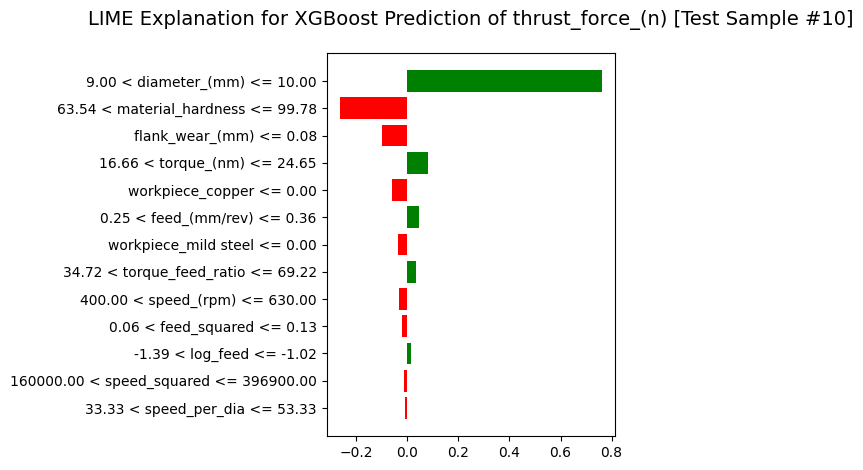


Top contributing features to this prediction:
9.00 < diameter_(mm) <= 10.00  : 0.7622
63.54 < material_hardness <= 99.78 : -0.2658
flank_wear_(mm) <= 0.08        : -0.1004
16.66 < torque_(nm) <= 24.65   : 0.0821
workpiece_copper <= 0.00       : -0.0591
0.25 < feed_(mm/rev) <= 0.36   : 0.0445
workpiece_mild steel <= 0.00   : -0.0367
34.72 < torque_feed_ratio <= 69.22 : 0.0344
400.00 < speed_(rpm) <= 630.00 : -0.0327
0.06 < feed_squared <= 0.13    : -0.0203
-1.39 < log_feed <= -1.02      : 0.0141
160000.00 < speed_squared <= 396900.00 : -0.0138
33.33 < speed_per_dia <= 53.33 : -0.0114


In [160]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load XGBoost model and test data from thrustforce results
xgb_model_thrust = results['XGBoost']['model']
X_test = results['XGBoost']['X_test']
feature_names = X_test.columns.tolist()

# Step 2: Choose test instance to explain
idx = 10  # 🔁 change to any index you want
instance = X_test.iloc[idx].values.reshape(1, -1)

# Step 3: Define predict function with inverse log transform
def predict_fn_thrust(X):
    log_preds = xgb_model_thrust.predict(X)
    return np.expm1(log_preds).reshape(-1, 1)

# Step 4: Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_test.values,
    feature_names=feature_names,
    mode='regression'
)

# Step 5: Generate LIME explanation
exp = explainer.explain_instance(
    data_row=instance.flatten(),
    predict_fn=predict_fn_thrust,
    num_features=len(feature_names)
)

# Step 6: Plot explanation
fig = exp.as_pyplot_figure()
fig.patch.set_facecolor('white')
plt.title(f"LIME Explanation for XGBoost Prediction of thrust_force_(n) [Test Sample #{idx}]", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Step 7: Print feature contributions
print("\nTop contributing features to this prediction:")
for feature, weight in exp.as_list():
    print(f"{feature:30} : {weight:.4f}")

# Optional: Show interactive output in notebook
exp.show_in_notebook()


## Explanations for 5 worst predictions for Thrustforce :


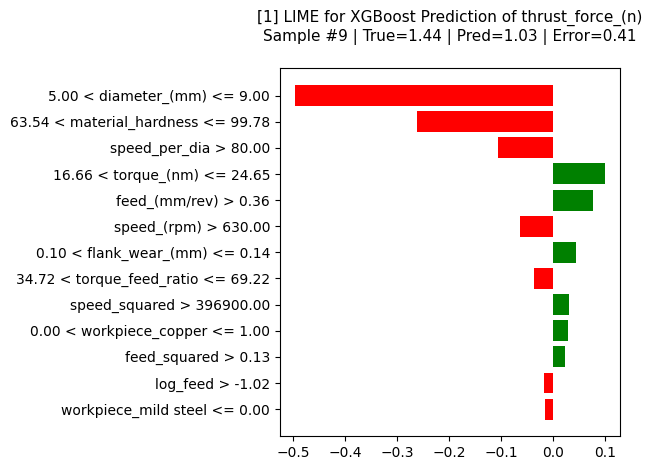


[Sample #9] True: 1.44, Pred: 1.03, Error: 0.41
5.00 < diameter_(mm) <= 9.00        : -0.4958
63.54 < material_hardness <= 99.78  : -0.2610
speed_per_dia > 80.00               : -0.1057
16.66 < torque_(nm) <= 24.65        : 0.0995
feed_(mm/rev) > 0.36                : 0.0773
speed_(rpm) > 630.00                : -0.0626
0.10 < flank_wear_(mm) <= 0.14      : 0.0446
34.72 < torque_feed_ratio <= 69.22  : -0.0361
speed_squared > 396900.00           : 0.0305
0.00 < workpiece_copper <= 1.00     : 0.0284
feed_squared > 0.13                 : 0.0231
log_feed > -1.02                    : -0.0180
workpiece_mild steel <= 0.00        : -0.0157
----------------------------------------------------------------------


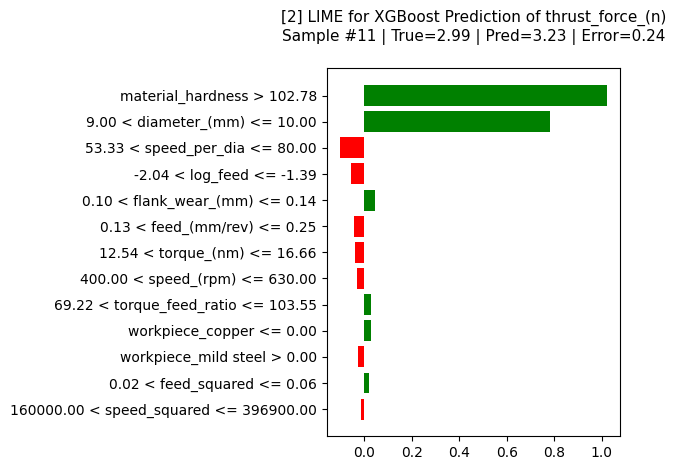


[Sample #11] True: 2.99, Pred: 3.23, Error: 0.24
material_hardness > 102.78          : 1.0210
9.00 < diameter_(mm) <= 10.00       : 0.7814
53.33 < speed_per_dia <= 80.00      : -0.1035
-2.04 < log_feed <= -1.39           : -0.0548
0.10 < flank_wear_(mm) <= 0.14      : 0.0444
0.13 < feed_(mm/rev) <= 0.25        : -0.0439
12.54 < torque_(nm) <= 16.66        : -0.0391
400.00 < speed_(rpm) <= 630.00      : -0.0312
69.22 < torque_feed_ratio <= 103.55 : 0.0275
workpiece_copper <= 0.00            : 0.0265
workpiece_mild steel > 0.00         : -0.0261
0.02 < feed_squared <= 0.06         : 0.0197
160000.00 < speed_squared <= 396900.00 : -0.0141
----------------------------------------------------------------------


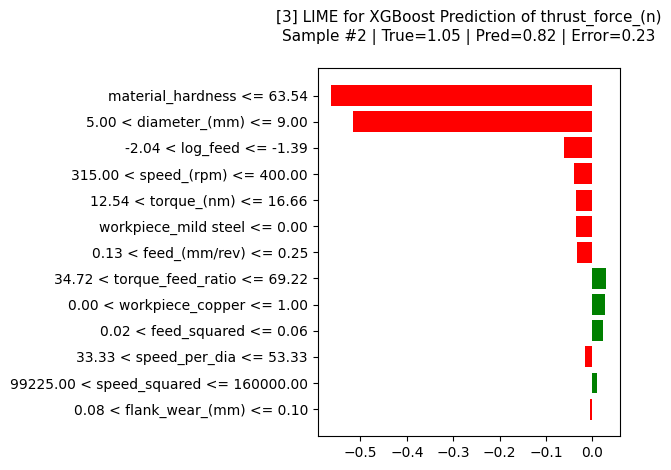


[Sample #2] True: 1.05, Pred: 0.82, Error: 0.23
material_hardness <= 63.54          : -0.5626
5.00 < diameter_(mm) <= 9.00        : -0.5159
-2.04 < log_feed <= -1.39           : -0.0610
315.00 < speed_(rpm) <= 400.00      : -0.0386
12.54 < torque_(nm) <= 16.66        : -0.0346
workpiece_mild steel <= 0.00        : -0.0343
0.13 < feed_(mm/rev) <= 0.25        : -0.0327
34.72 < torque_feed_ratio <= 69.22  : 0.0302
0.00 < workpiece_copper <= 1.00     : 0.0284
0.02 < feed_squared <= 0.06         : 0.0222
33.33 < speed_per_dia <= 53.33      : -0.0164
99225.00 < speed_squared <= 160000.00 : 0.0107
0.08 < flank_wear_(mm) <= 0.10      : -0.0055
----------------------------------------------------------------------


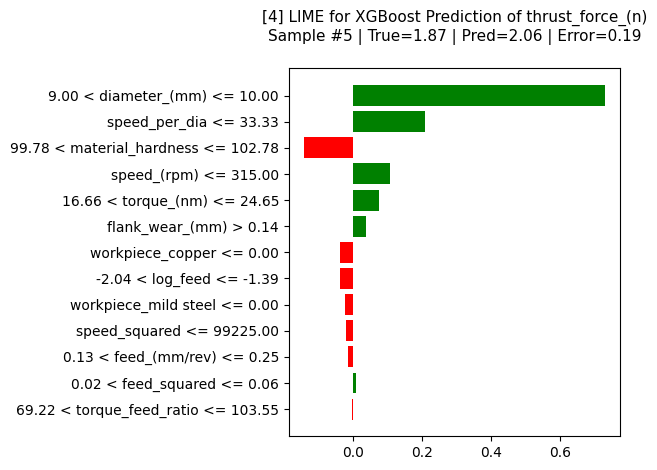


[Sample #5] True: 1.87, Pred: 2.06, Error: 0.19
9.00 < diameter_(mm) <= 10.00       : 0.7296
speed_per_dia <= 33.33              : 0.2072
99.78 < material_hardness <= 102.78 : -0.1424
speed_(rpm) <= 315.00               : 0.1064
16.66 < torque_(nm) <= 24.65        : 0.0767
flank_wear_(mm) > 0.14              : 0.0388
workpiece_copper <= 0.00            : -0.0383
-2.04 < log_feed <= -1.39           : -0.0378
workpiece_mild steel <= 0.00        : -0.0224
speed_squared <= 99225.00           : -0.0210
0.13 < feed_(mm/rev) <= 0.25        : -0.0157
0.02 < feed_squared <= 0.06         : 0.0098
69.22 < torque_feed_ratio <= 103.55 : -0.0028
----------------------------------------------------------------------


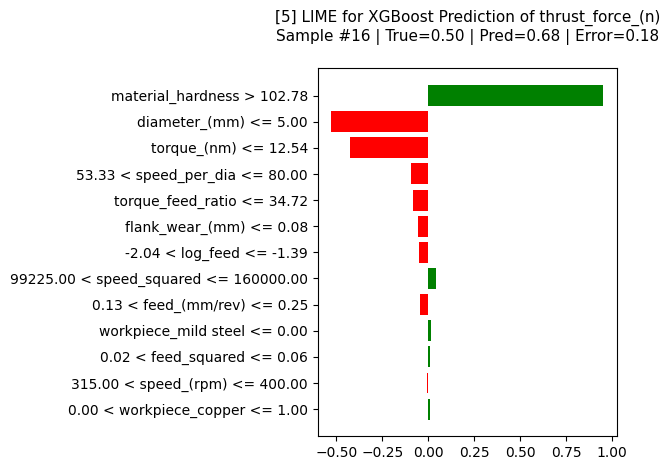


[Sample #16] True: 0.50, Pred: 0.68, Error: 0.18
material_hardness > 102.78          : 0.9524
diameter_(mm) <= 5.00               : -0.5281
torque_(nm) <= 12.54                : -0.4264
53.33 < speed_per_dia <= 80.00      : -0.0920
torque_feed_ratio <= 34.72          : -0.0816
flank_wear_(mm) <= 0.08             : -0.0578
-2.04 < log_feed <= -1.39           : -0.0486
99225.00 < speed_squared <= 160000.00 : 0.0436
0.13 < feed_(mm/rev) <= 0.25        : -0.0434
workpiece_mild steel <= 0.00        : 0.0150
0.02 < feed_squared <= 0.06         : 0.0069
315.00 < speed_(rpm) <= 400.00      : -0.0062
0.00 < workpiece_copper <= 1.00     : 0.0060
----------------------------------------------------------------------


In [152]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import numpy as np

# === Extract model and test data ===
xgb_model = results['XGBoost']['model']
X_test = results['XGBoost']['X_test']
y_test_log = results['XGBoost']['y_test']
y_test_true = np.expm1(y_test_log)
y_pred_true = np.expm1(xgb_model.predict(X_test))

# === Calculate absolute errors ===
errors = np.abs(y_test_true - y_pred_true)

# === Get indices of top N worst errors ===
N = 5
worst_indices = np.argsort(-errors)[:N]

# === Create LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_test.values,
    feature_names=X_test.columns.tolist(),
    mode='regression'
)

# === Loop through top N errors and explain
for rank, idx in enumerate(worst_indices, 1):
    instance = X_test.iloc[idx].values.reshape(1, -1)

    def predict_fn(X):
        return np.expm1(xgb_model.predict(X)).reshape(-1, 1)

    exp = explainer.explain_instance(
        data_row=instance.flatten(),
        predict_fn=predict_fn,
        num_features=len(X_test.columns)
    )

    # Plot LIME explanation
    fig = exp.as_pyplot_figure()
    fig.patch.set_facecolor('white')
    plt.title(f"[{rank}] LIME for XGBoost Prediction of thrust_force_(n)\nSample #{idx} | True={y_test_true.iloc[idx]:.2f} | Pred={y_pred_true[idx]:.2f} | Error={errors.iloc[idx]:.2f}",
              fontsize=11, pad=20)
    plt.tight_layout()
    plt.show()

    # Text summary
    print(f"\n[Sample #{idx}] True: {y_test_true.iloc[idx]:.2f}, Pred: {y_pred_true[idx]:.2f}, Error: {errors.iloc[idx]:.2f}")
    for feature, weight in exp.as_list():
        print(f"{feature:35} : {weight:.4f}")
    print("-" * 70)


# PDP Explanation for XGBoost prediction of thrustforce :

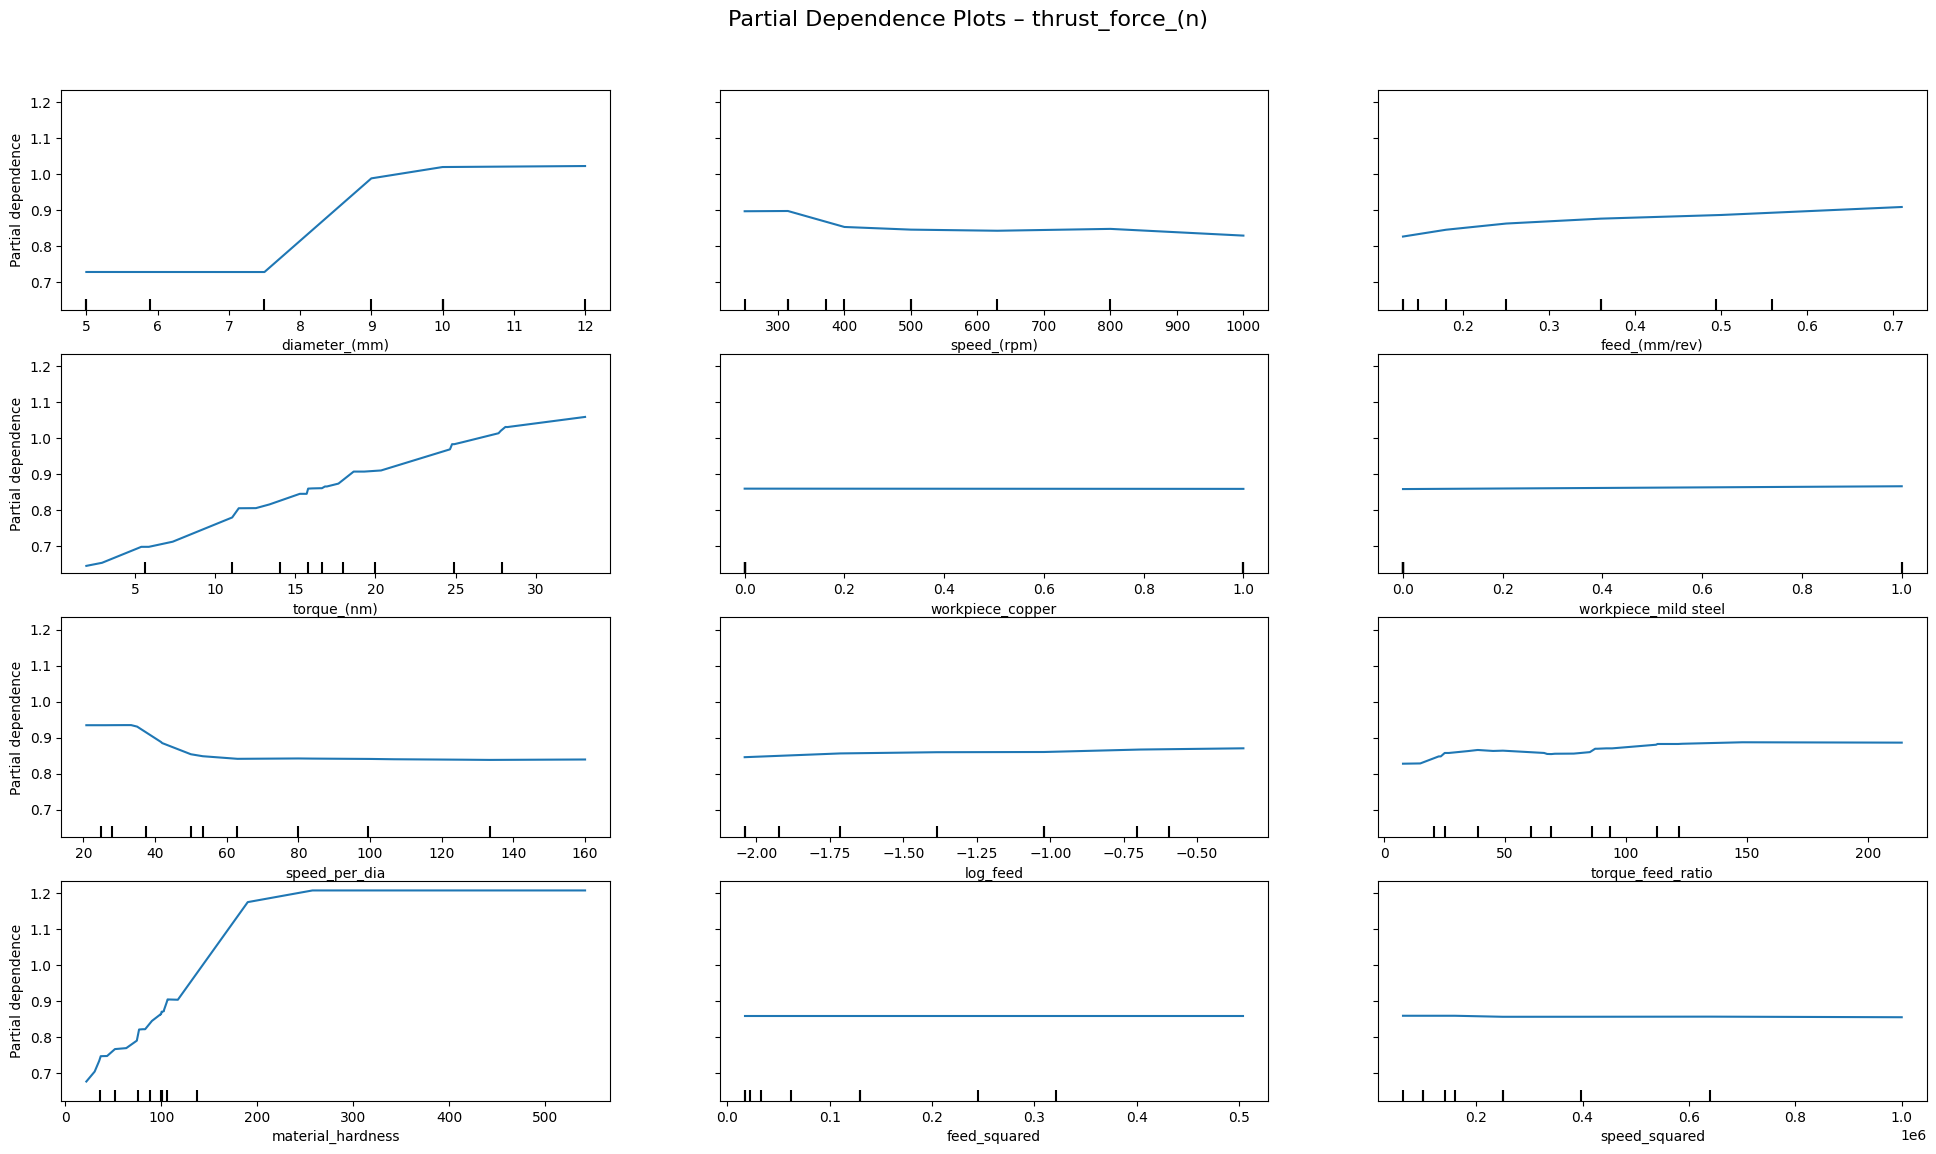

In [153]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# XGBoost model and test features
xgb_model = results['XGBoost']['model']
X_test = results['XGBoost']['X_test']

# Choose features to explain
features_to_plot = [
    'diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 
    'torque_(nm)', 'workpiece_copper', 'workpiece_mild steel',
    'speed_per_dia', 'log_feed', 'torque_feed_ratio', 
    'material_hardness', 'feed_squared', 'speed_squared']  
fig, ax = plt.subplots(figsize=(20, 12)) 
# Plot PDPs
disp = PartialDependenceDisplay.from_estimator(
    estimator=xgb_model,
    X=X_test,
    features=features_to_plot,
    feature_names=X_test.columns,
    kind='average',              # or 'individual' if you want ICE curves
    grid_resolution=50,
    n_jobs=-1,
    ax=ax
)

plt.suptitle("Partial Dependence Plots – thrust_force_(n)", fontsize=16)
plt.tight_layout(pad=3.0)
plt.show()

